In [96]:
import os
import requests
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

In [97]:
response = requests.get('https://raw.githubusercontent.com/sajnanshetty/deep-learning/master/s12/annotation/data/dog_annotation_coco.json')

In [98]:
# parse file
annotation_dict = response.json()

In [99]:
format_json = {}
for image in annotation_dict["images"]:
    format_json.update({image["id"]: {"file_name": image["file_name"], "image_x":  image["width"], "image_y": image["height"]}})
    

In [100]:
bbbox_properties = {}
for item in annotation_dict["annotations"]:
    bbbox_properties.update({item["image_id"]: {"bbox_x": item["bbox"][0],
                                                "bbox_y": item["bbox"][1],
                                                "bbox_width": item["bbox"][2],
                                               "bbox_height": item["bbox"][3]}})

In [101]:
bbbox_properties
merge_dicts= {}
for i in range(1, 51):
    val3 = {}
    val1 = format_json[i]
    val2 = bbbox_properties[i]
    val3.update(val1)
    val3.update(val2)
    merge_dicts.update({i: val3})

In [102]:
### Display the data

In [104]:
df1 = pd.DataFrame.from_dict(merge_dicts).T
df1.head(5)

,file_name,image_x,image_y,bbox_x,bbox_y,bbox_width,bbox_height
1,dog1.jpg,190,265,24,79,149,131
2,dog2.jpg,276,183,16,21,230,140
3,dog3.jpg,259,194,14,12,211,161
4,dog4.jpg,275,184,78,4,155,179
5,dog5.jpg,259,194,123,29,116,157


In [105]:
normalize_inputs = {}
width_divider =['bbox_width', 'bbox_x']
height_divider =['bbox_height', 'bbox_y']
for i, val in merge_dicts.items():
    new_dict = {}
    width = val['image_x'] 
    height = val['image_y']
    x = {"N_"+key: val[key]/width for key in width_divider}
    y = {"N_"+key: val[key]/height for key in height_divider}
    new_dict.update(x)
    new_dict.update(y)
    normalize_inputs.update({i: new_dict})
    

In [106]:
## Display Normalized data

In [107]:
df2 = pd.DataFrame.from_dict(normalize_inputs).T
df2.head(5)

,N_bbox_width,N_bbox_x,N_bbox_height,N_bbox_y
1,0.784211,0.126316,0.494340,0.298113
2,0.833333,0.057971,0.765027,0.114754
3,0.814672,0.054054,0.829897,0.061856
4,0.563636,0.283636,0.972826,0.021739
5,0.447876,0.474903,0.809278,0.149485


In [78]:
# Take x and y to fim=nd k means clustering

In [108]:
normalize_values = normalize_inputs.values()
x = [item["N_bbox_width"] for item in normalize_values]
y = [item["N_bbox_height"] for item in normalize_values]


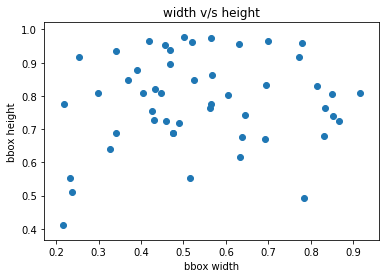

In [109]:
plt.scatter(x, y)
plt.xlabel("bbox width")
plt.ylabel("bbox height")
plt.title("width v/s height")
plt.show()

In [81]:
### plot in log scale

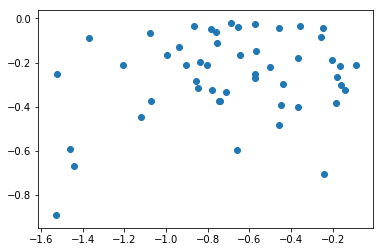

In [110]:
import numpy as np 
x1 = np.log(x) 
y1 = np.log(y) 
plt.scatter(x1 ,y1)
plt.show()

In [92]:
## convert to numpy array to work on Kmeans algorithm

In [111]:
X = np.array(list(zip(x, y)) )

In [112]:
cost = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    cost.append(km.inertia_)

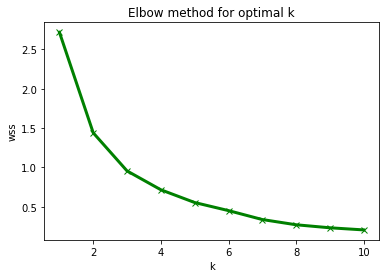

In [113]:
plt.plot(K, cost, 'bx-', color ='g', linewidth ='3')
plt.xlabel('k')
plt.ylabel('wss') #Within-Cluster-Sum of Squared Errors 
plt.title('Elbow method for optimal k')
plt.show()

In [ ]:
# By looking at grapgh K =3 is best suitable

In [114]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [115]:
print(kmeans.cluster_centers_)

[[0.29831118 0.59028987]
 [0.4647697  0.84415923]
 [0.76853942 0.76436616]]


In [ ]:
## Show the centroid in black color

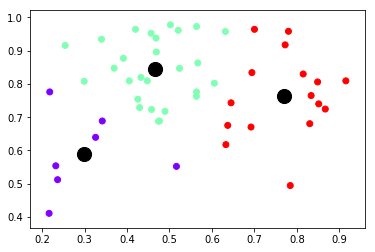

In [116]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', s=200)